## Importing Libraries

In [ ]:
!pip install category_encoders

In [ ]:
# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# To check for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To apply BinaryEncoding
import category_encoders as ce

sns.set(style = 'darkgrid')

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Dataset Loading

In [ ]:
# Mounting google drive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path to dataset in the drive
path = '/content/drive/MyDrive/cars_dataset.csv'
df = pd.read_csv(path)

## Dataset Information

In [ ]:
df.head()

,Année,Transmission,Type de carburant,Type,Secteur,Kilométrage,Marque,Modèle,Nombre de portes,Origine,Première main,Puissance fiscale,État,Prix
0,2016,Manuelle,Diesel,"Voitures d'occasion, à vendre",Maarif,130 000 - 139 999,Volkswagen,Tiguan,5.00,WW au Maroc,Oui,8 CV,Correct,180 000 DH
1,2023,Automatique,Essence,"Voitures d'occasion, à vendre",2 Mars,40 000 - 44 999,Cupra,Formentor,5.00,WW au Maroc,Oui,11 CV,Excellent,PRIX NON SPÉCIFIÉ
2,2021,Automatique,Hybride,"Voitures d'occasion, à vendre",2 Mars,70 000 - 74 999,Porsche,Cayenne,5.00,Importée neuve,Oui,17 CV,Excellent,PRIX NON SPÉCIFIÉ
3,2022,Automatique,Hybride,"Voitures d'occasion, à vendre",Agdal,60 000 - 64 999,Mercedes-Benz,Classe E,5.00,Importée neuve,Oui,8 CV,Excellent,PRIX NON SPÉCIFIÉ
4,2018,Manuelle,Diesel,"Voitures d'occasion, à vendre",2 Mars,100 000 - 109 999,Citroen,C3,5.00,WW au Maroc,Non,6 CV,Très bon,109 000 DH


In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns') # dataset size

The dataset has 28140 rows and 14 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Année              28140 non-null  object 
 1   Transmission       28140 non-null  object 
 2   Type de carburant  28140 non-null  object 
 3   Type               3424 non-null   object 
 4   Secteur            14213 non-null  object 
 5   Kilométrage        28140 non-null  object 
 6   Marque             28140 non-null  object 
 7   Modèle             28140 non-null  object 
 8   Nombre de portes   23489 non-null  float64
 9   Origine            22646 non-null  object 
 10  Première main      21519 non-null  object 
 11  Puissance fiscale  28140 non-null  object 
 12  État               21370 non-null  object 
 13  Prix               28140 non-null  object 
dtypes: float64(1), object(13)
memory usage: 3.0+ MB


In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(f"Number of unique values in {i} is {df[i].nunique()}")

Number of unique values in Année is 40
Number of unique values in Transmission is 2
Number of unique values in Type de carburant is 4
Number of unique values in Type is 1
Number of unique values in Secteur is 438
Number of unique values in Kilométrage is 37
Number of unique values in Marque is 51
Number of unique values in Modèle is 492
Number of unique values in Nombre de portes is 2
Number of unique values in Origine is 4
Number of unique values in Première main is 2
Number of unique values in Puissance fiscale is 38
Number of unique values in État is 7
Number of unique values in Prix is 652


In [ ]:
print(f"Number of duplicate rows {df.duplicated().sum()}") # Duplicate Values

Number of duplicate rows 18698


In [ ]:
df.isnull().sum() # Missing Values/Null Values

,0
Année,0
Transmission,0
Type de carburant,0
Type,24716
Secteur,13927
Kilométrage,0
Marque,0
Modèle,0
Nombre de portes,4651
Origine,5494


## Cleaning data

In [ ]:
# Deleting duplicated rows
df.drop_duplicates(inplace=True)
print(f"new size of dataset {df.shape}")

new size of dataset (9442, 14)


In [ ]:
print(f"size of rows with no specified price {df[df['Prix'] == 'PRIX NON SPÉCIFIÉ'].shape}")
# Deleting rows with unspecified price
df.drop(df[df['Prix'] == "PRIX NON SPÉCIFIÉ"].index, inplace=True)
print(f"new size of dataset {df.shape}")

size of rows with no specified price (606, 14)
new size of dataset (8836, 14)


In [ ]:
df.isnull().sum()

,0
Année,0
Transmission,0
Type de carburant,0
Type,8103
Secteur,4547
Kilométrage,0
Marque,0
Modèle,0
Nombre de portes,1510
Origine,1800


In [ ]:
# removing currency from price column
import re

df['Prix'] = df['Prix'].str.replace(r'[^\d]', '', regex=True)
df['Prix'] = df['Prix'].astype(int) # Converting Prix column to int

In [ ]:
# removing string chars from Puissance fiscale column
df['Puissance fiscale'] = df['Puissance fiscale'].astype(str).str.replace(r'[^\d]', '', regex=True)

# converting Puissance fiscale and to int
df['Puissance fiscale'] = df['Puissance fiscale'].astype(int)

In [ ]:
# Calculating mid point of Kilométrage column
df['min'] = df['Kilométrage'].str.split(' - ').str[0]
df['max'] = df['Kilométrage'].str.split(' - ').str[1]

df['min'] = df['min'].str.replace(r'[^\d]', '', regex=True)
df['max'] = df['max'].str.replace(r'[^\d]', '', regex=True)

# replacing nan values in max column with the value of min column because some values in Kilométrage contain strings like 'Plusde500000'
for i in df[df['max'].isnull()].index:
  df.loc[i, 'max'] = df.loc[i, 'min']

df['Kilométrage'] = (df['min'].astype(int) + df['max'].astype(int)) // 2
df['Kilométrage'] = df['Kilométrage'].astype(int)

df.drop(['min', 'max'], axis=1, inplace=True)

In [ ]:
# adding a column Age to calculate the age of the car
from datetime import date

df['Année'] = df['Année'].str.replace(r'[^\d]', '', regex=True)

df['Age'] = date.today().year - df['Année'].astype(int)
df.drop('Année', axis=1, inplace=True)

In [ ]:
# Handling missing values Premeire main column

# finding mean of age and kilomertage
index = df[df['Première main'] == 'Oui'].index
sum_age = 0
sum_kilometrage = 0
for i in index:
  sum_age += df.loc[i, 'Age']
  sum_kilometrage += df.loc[i, 'Kilométrage']
mean_age = sum_age//len(index)
mean_kilometrage = sum_kilometrage//len(index)


# replace nan values in Premiere main with oui if less than mean of age and kilometrage otherwise Non
for i in df[df['Première main'].isnull()].index:
  if df.loc[i, 'Age'] < mean_age and df.loc[i, 'Kilométrage'] < mean_kilometrage:
    df.loc[i, 'Première main'] = 'Oui'
  else:
    df.loc[i, 'Première main'] = 'Non'

In [ ]:
# Handlling missing values Etat column

# replace nan values with mode
df['État'] = df['État'].fillna(df['État'].mode()[0])

In [ ]:
# Handlling missing values Nombre de portes column

# replace nan values with the mean
df['Nombre de portes'] = df['Nombre de portes'].fillna(df['Nombre de portes'].mean().astype(int))
df['Nombre de portes'] = df['Nombre de portes'].astype(int) # convert to int

In [ ]:
# Handlling missing values Origin column

# replace with mode
df['Origine'] = df['Origine'].fillna(df['Origine'].mode()[0])

In [ ]:
# checking data after cleaning
print(df.isnull().sum())
print('----------------------\n')
print(f'Dtatset size {df.shape}')
print('----------------------\n')
print(f"size of rows with no specified price is {df[df['Prix'] == 'PRIX NON SPÉCIFIÉ'].shape[0]}")
print('----------------------\n')
print(df.info())
print('----------------------\n')
for i in df.columns.tolist():
  print(f"Number of unique values in {i} is {df[i].nunique()}")
df.head()

Transmission            0
Type de carburant       0
Type                 8103
Secteur              4547
Kilométrage             0
Marque                  0
Modèle                  0
Nombre de portes        0
Origine                 0
Première main           0
Puissance fiscale       0
État                    0
Prix                    0
Age                     0
dtype: int64
----------------------

Dtatset size (8836, 14)
----------------------

size of rows with no specified price is 0
----------------------

<class 'pandas.core.frame.DataFrame'>
Index: 8836 entries, 0 to 11719
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Transmission       8836 non-null   object
 1   Type de carburant  8836 non-null   object
 2   Type               733 non-null    object
 3   Secteur            4289 non-null   object
 4   Kilométrage        8836 non-null   int64 
 5   Marque             8836 non-null   object
 6   M

,Transmission,Type de carburant,Type,Secteur,Kilométrage,Marque,Modèle,Nombre de portes,Origine,Première main,Puissance fiscale,État,Prix,Age
0,Manuelle,Diesel,"Voitures d'occasion, à vendre",Maarif,134999,Volkswagen,Tiguan,5,WW au Maroc,Oui,8,Correct,180000,9
4,Manuelle,Diesel,"Voitures d'occasion, à vendre",2 Mars,104999,Citroen,C3,5,WW au Maroc,Non,6,Très bon,109000,7
7,Automatique,Diesel,"Voitures d'occasion, à vendre",Ain Sebaa,134999,Mercedes-Benz,Classe CLA,5,Dédouanée,Non,8,Bon,430000,5
8,Automatique,Diesel,"Voitures d'occasion, à vendre",2 Mars,144999,Mercedes-Benz,Classe E,5,Importée neuve,Oui,8,Excellent,190000,11
11,Automatique,Diesel,"Voitures d'occasion, à vendre",Autre secteur,104999,Land Rover,Range Rover Sport,5,Importée neuve,Non,12,Très bon,670000,6


## Exploratory Data Analysis (EDA)

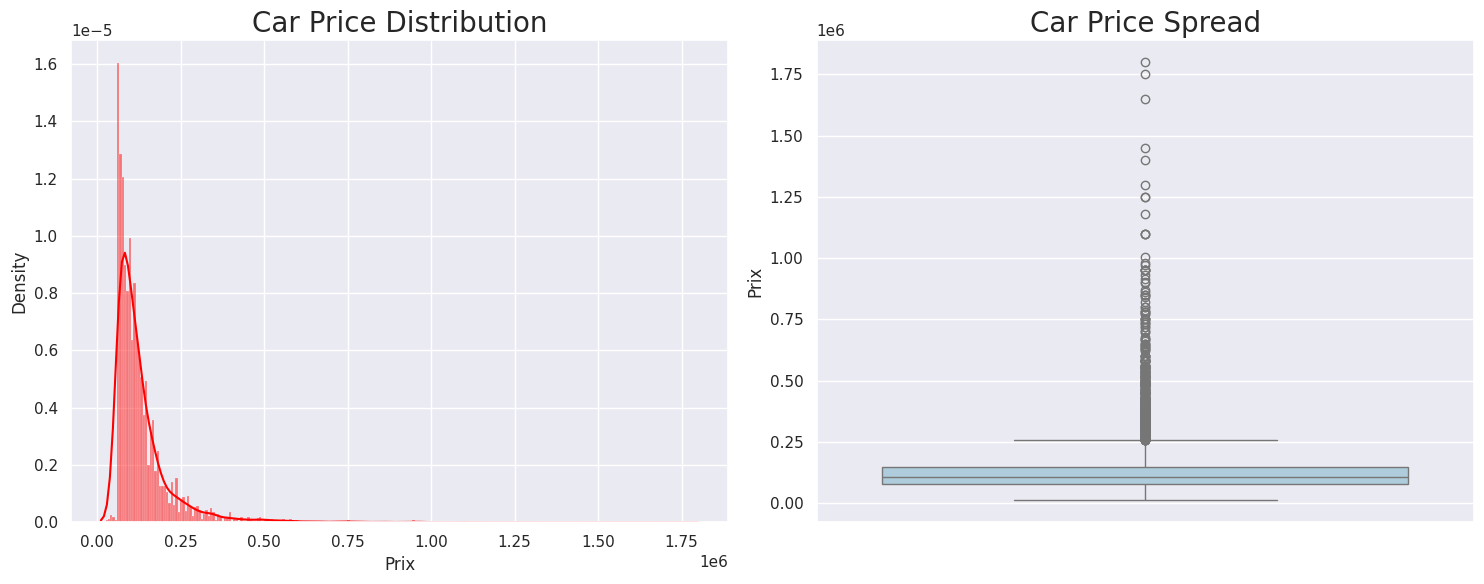

In [ ]:
# Target feature distribution
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=df["Prix"], stat='density', color="red", kde=True)
plt.title("Car Price Distribution",fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["Prix"], palette="Paired")
plt.title("Car Price Spread", fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# checking the skewness of the Prix column
pd.set_option('display.float_format', '{:.2f}'.format)
df["Prix"].agg(["min","mean","median","max","std","skew"])

,Prix
min,11000.00
mean,133343.37
median,105000.00
max,1800000.00
std,104077.53
skew,5.05


 **Insights**
* The Price column exhibits positive skewness with a skewness value of 5.05, indicating that the distribution is skewed to the right. This means that the majority of the data points are concentrated on the left side, and the tail of the distribution is longer on the right side.
* We can clearly observe that there is a significant difference between mean & median value.
* We can also make an insight that most of the car's price is below 250000 DH.

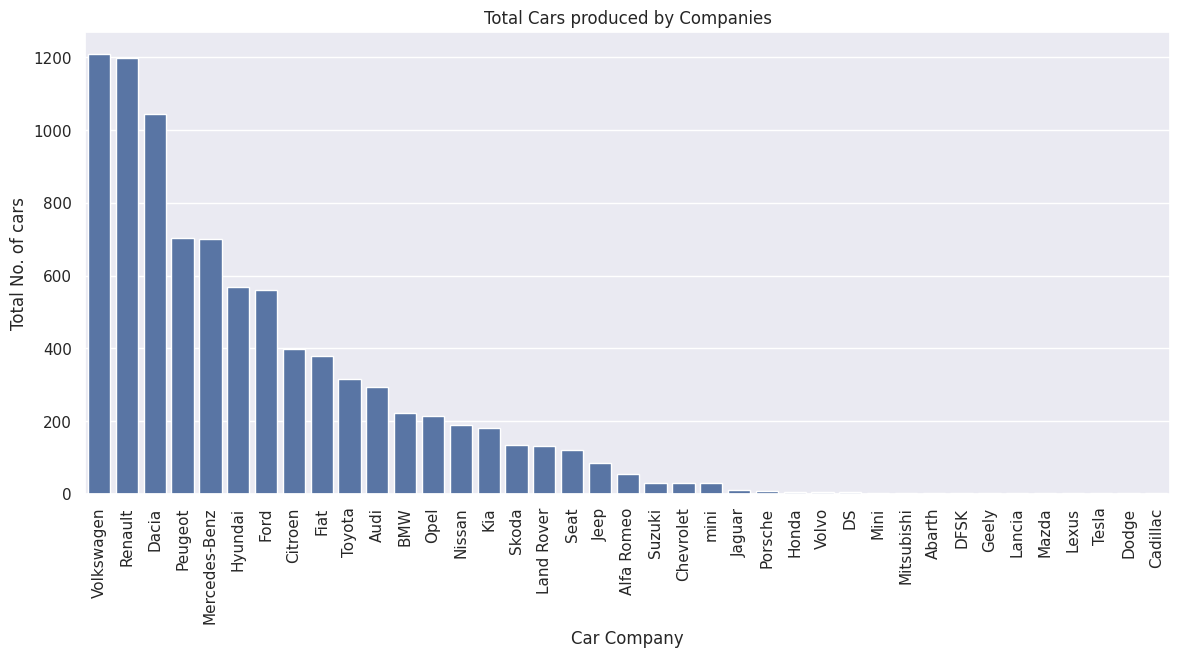

In [ ]:
# Visualizing Total No. of cars sold by different company
plt.figure(figsize=(14,6))
cars = df["Marque"].value_counts()
sns.barplot(x=cars.index, y=cars.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars")
plt.title("Total Cars produced by Companies")
plt.xticks(rotation=90)
plt.show()

**Insights**
* Renault and Volkswagen seems to be the most on sale cars.
* DFSK, Geely, Lancia, Mazda and Cadillac seems to be the least on sale cars.

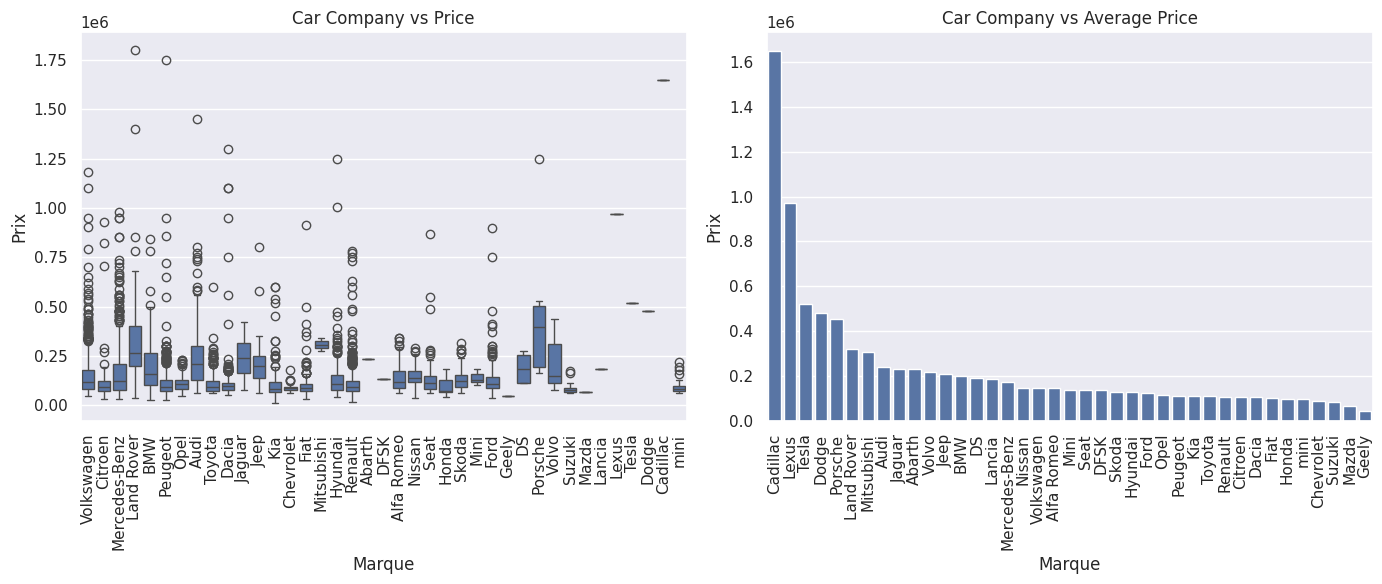

In [ ]:
# Visualizing Car Make with Price
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='Marque', y='Prix', data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price")

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby('Marque')['Prix'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="Prix",data=x)
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price")

plt.tight_layout()
plt.show()

**Insights**

* Land Rover & Audi & Dodge & Porsche and Cadillac seems to have the highest price range cars.

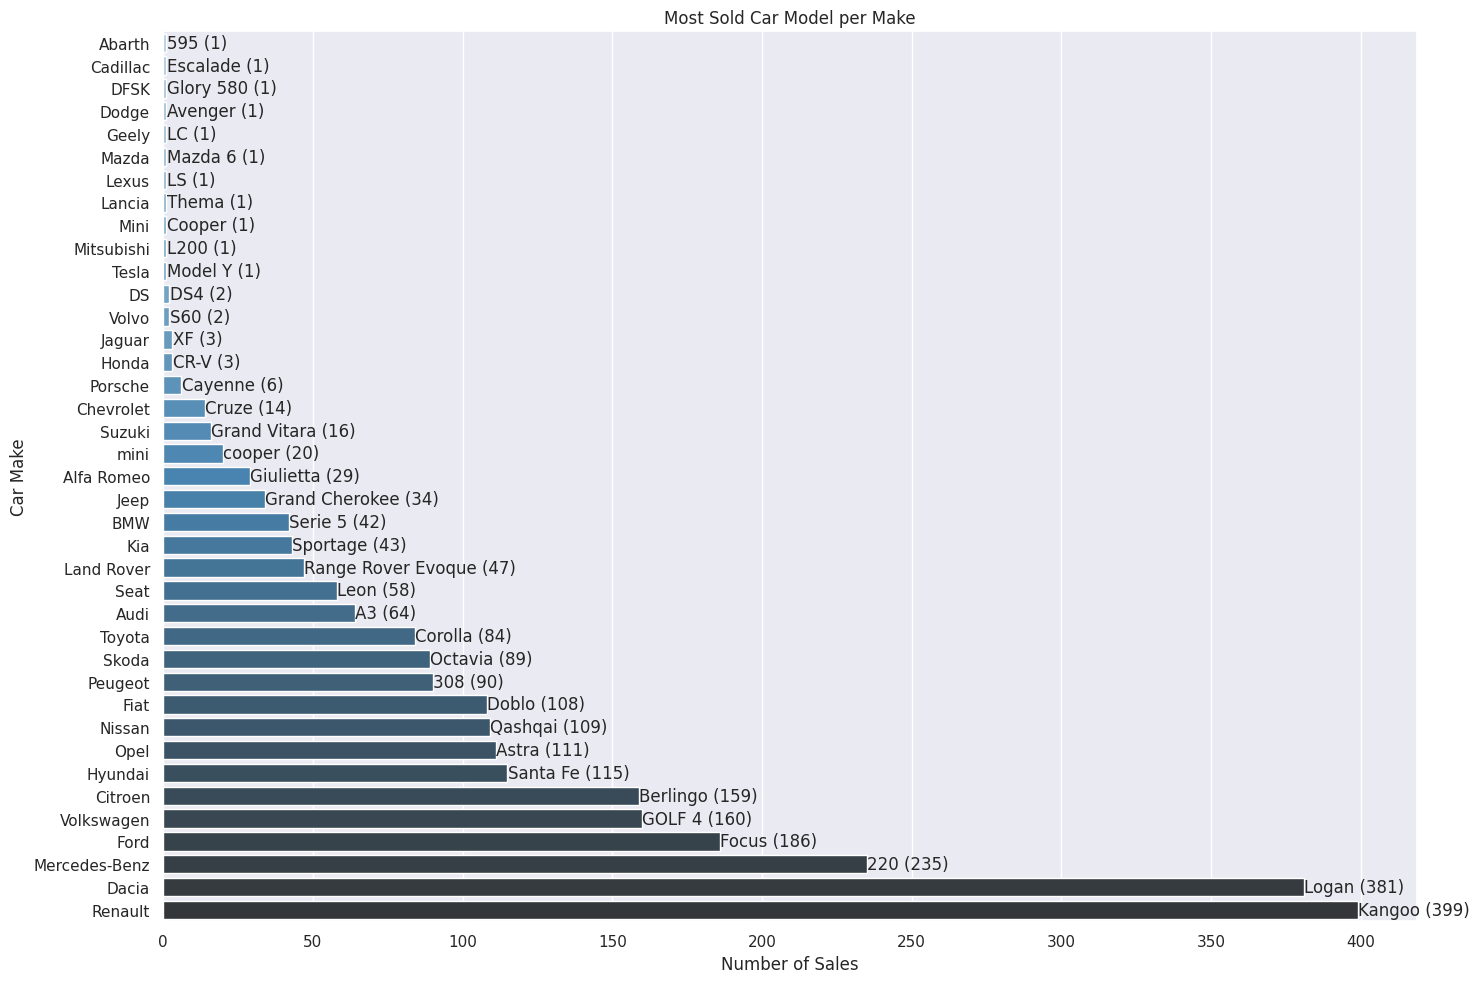

In [ ]:
# Visualizing most selled model for each car company name
most_sold_models = df.groupby('Marque')['Modèle'].value_counts().groupby(level=0).head(1).reset_index(name='Count')
most_sold_models = most_sold_models.sort_values('Count', ascending=True)

plt.figure(figsize=(15, 10))
barplot = sns.barplot(
    data=most_sold_models,
    y='Marque',
    x='Count',
    palette='Blues_d'
)

# Add model names as labels on the bars
for bar, model, count in zip(barplot.patches, most_sold_models['Modèle'], most_sold_models['Count']):
    barplot.text(
        bar.get_width() + 0.1,         # x position after the bar ends
        bar.get_y() + bar.get_height()/2,  # vertical center of the bar
        f"{model} ({count})",
        va='center'
    )

plt.title('Most Sold Car Model per Make')
plt.xlabel('Number of Sales')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

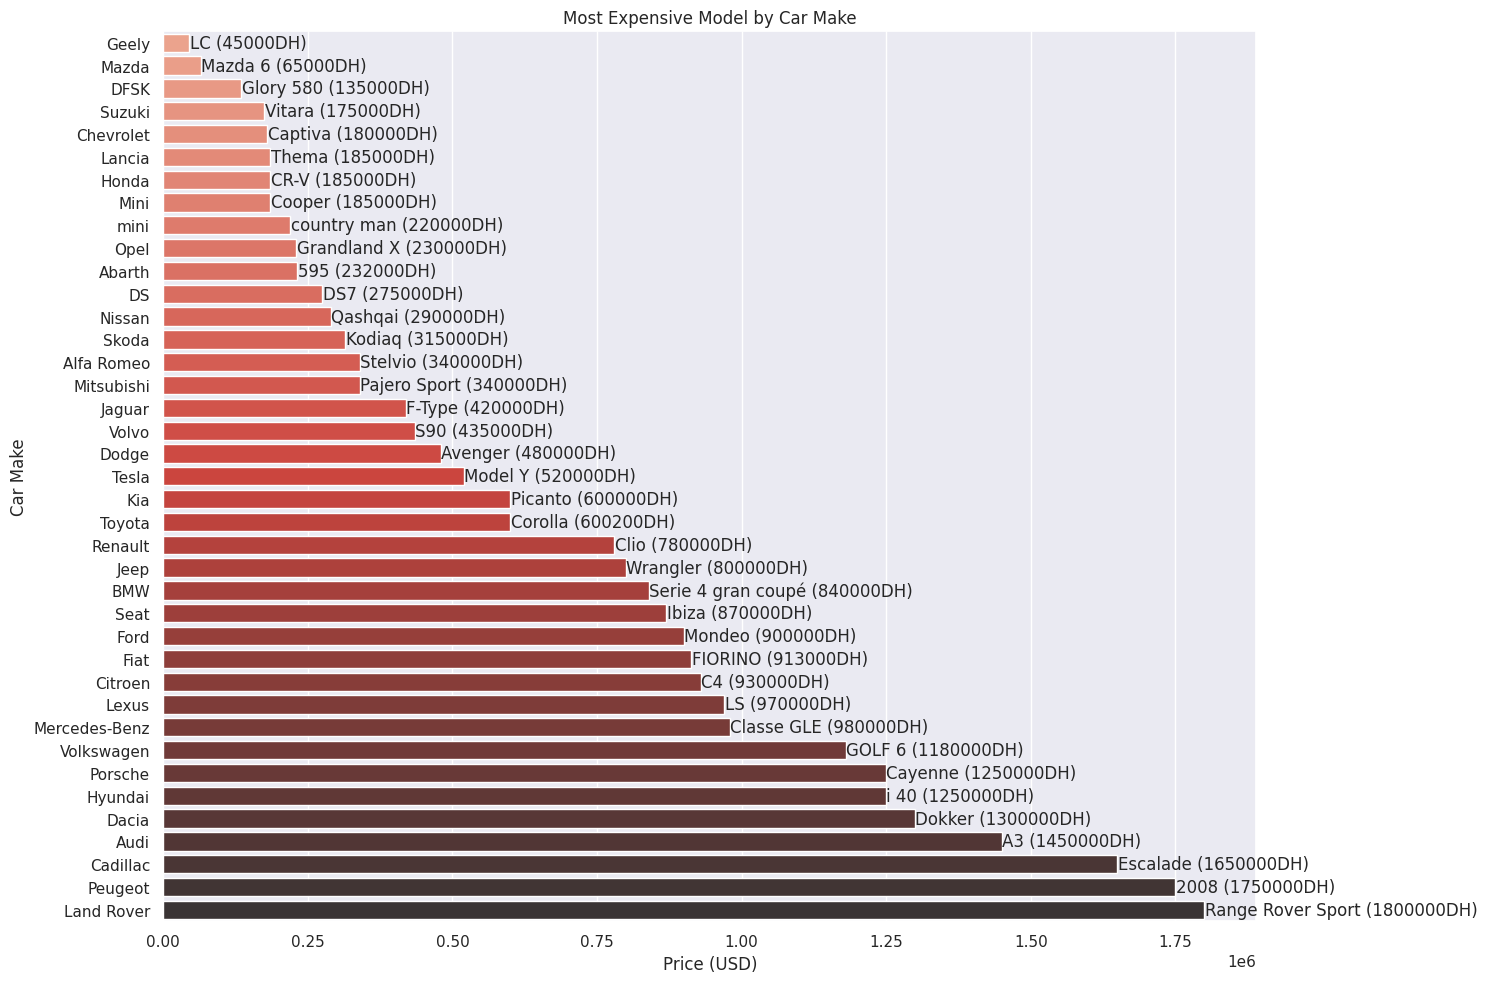

In [ ]:
# Visualzing most expansive model from a car make
idx = df.groupby('Marque')['Prix'].idxmax()
most_expensive_models = df.loc[idx].sort_values('Prix', ascending=True)

plt.figure(figsize=(15, 10))
barplot = sns.barplot(
    data=most_expensive_models,
    y='Marque',
    x='Prix',
    palette='Reds_d'
)

# Add labels with model names and price
for bar, model, price in zip(barplot.patches, most_expensive_models['Modèle'], most_expensive_models['Prix']):
    barplot.text(
        price + 500,  # x-position after the bar
        bar.get_y() + bar.get_height() / 2,  # y-position centered
        f"{model} ({price}DH)",
        va='center'
    )

plt.title('Most Expensive Model by Car Make')
plt.xlabel('Price (USD)')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

In [ ]:
# Function to visualize categorical features

def Categorical_visualization(col):
  plt.figure(figsize=(20,8))
  plt.subplot(1,3,1)
  sns.countplot(x=col, data=df, palette='Paired', order= df[col].value_counts().index)
  plt.title(f'{col} Distribution', pad= 20, fontweight= 'black', fontsize=20)
  plt.xticks(rotation=90)

  plt.subplot(1,3,2)
  sns.boxplot(x=col, y='Prix', data=df, palette='Paired')
  plt.title(f'{col} Vs Price', pad=20, fontweight='black', fontsize=20)
  plt.xticks(rotation=90)

  plt.subplot(1,3,3)
  x = pd.DataFrame(df.groupby(col)['Prix'].mean().sort_values(ascending=False))
  sns.barplot(x=x.index, y='Prix', data=x, palette='Paired')
  plt.title( f'{col} Vs Average price', pad=20, fontweight='black', fontsize=20)
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

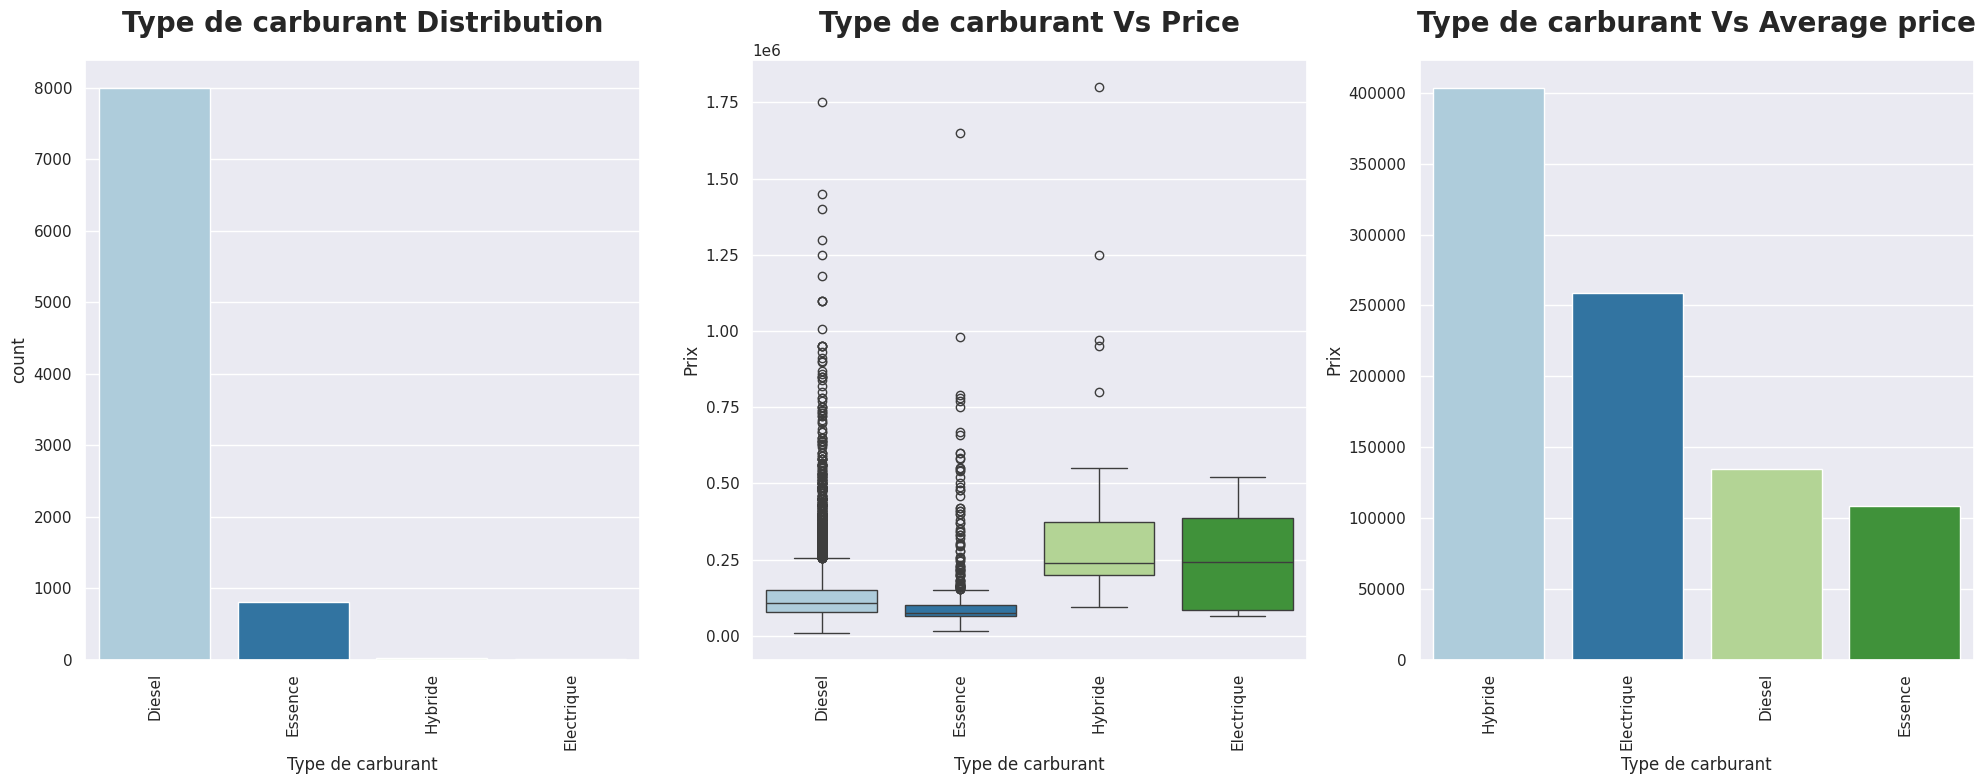

In [ ]:
# Visualizing Car Fuel Type Feature
Categorical_visualization('Type de carburant')

In [ ]:
df[df['Type de carburant'] == 'Electrique'].shape[0]

8

In [ ]:
df[df['Type de carburant'] == 'Hybride'].shape[0]

30

**Insights**
* We can clearly make an inisght that Cars having Diesel fuel system is mostly sold.
* From the second plot we can make an insight that Diesel and Essence Fuel Sysytem cars are availabe within large price range including Hybride with a low car count.
* From the third plot we can make an inisght that the Average price of Essence fuel type cars are less than diesel fuel type cars.


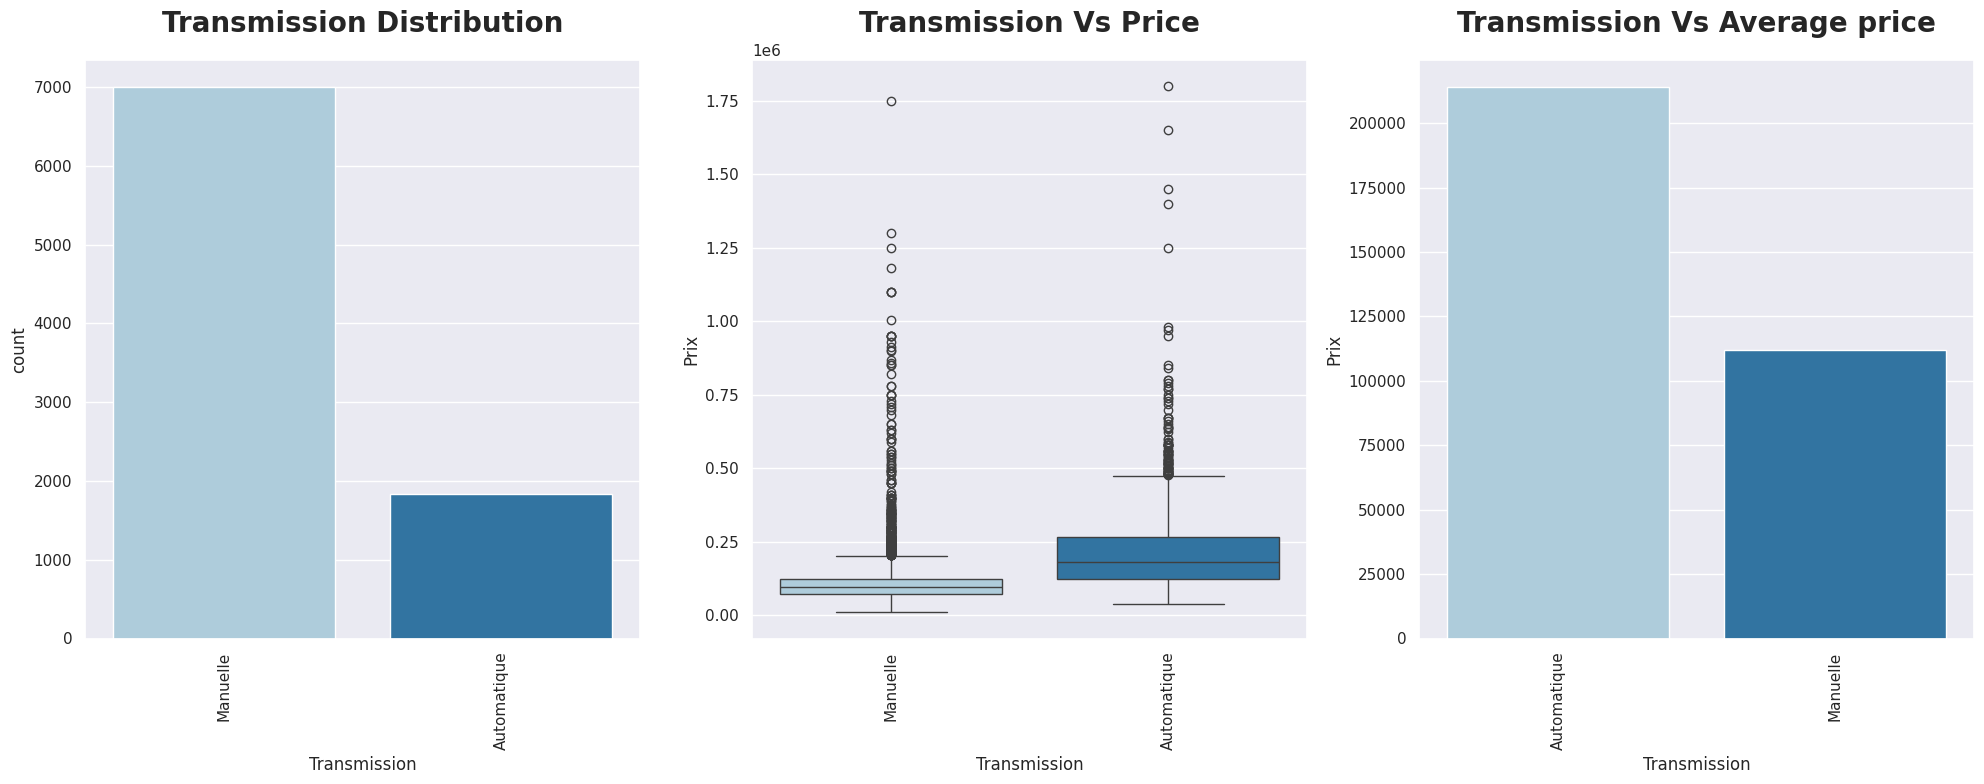

In [ ]:
# Visualizing Car Transmission Feature
Categorical_visualization('Transmission')

**Insight**
* From the first graph we see that Manuelle Transmission is sold more that Automatique
* From the second plot we see that Automatique transmission is availabe within every price range
* Automatique transmission has more than twice the average price that Manuelle

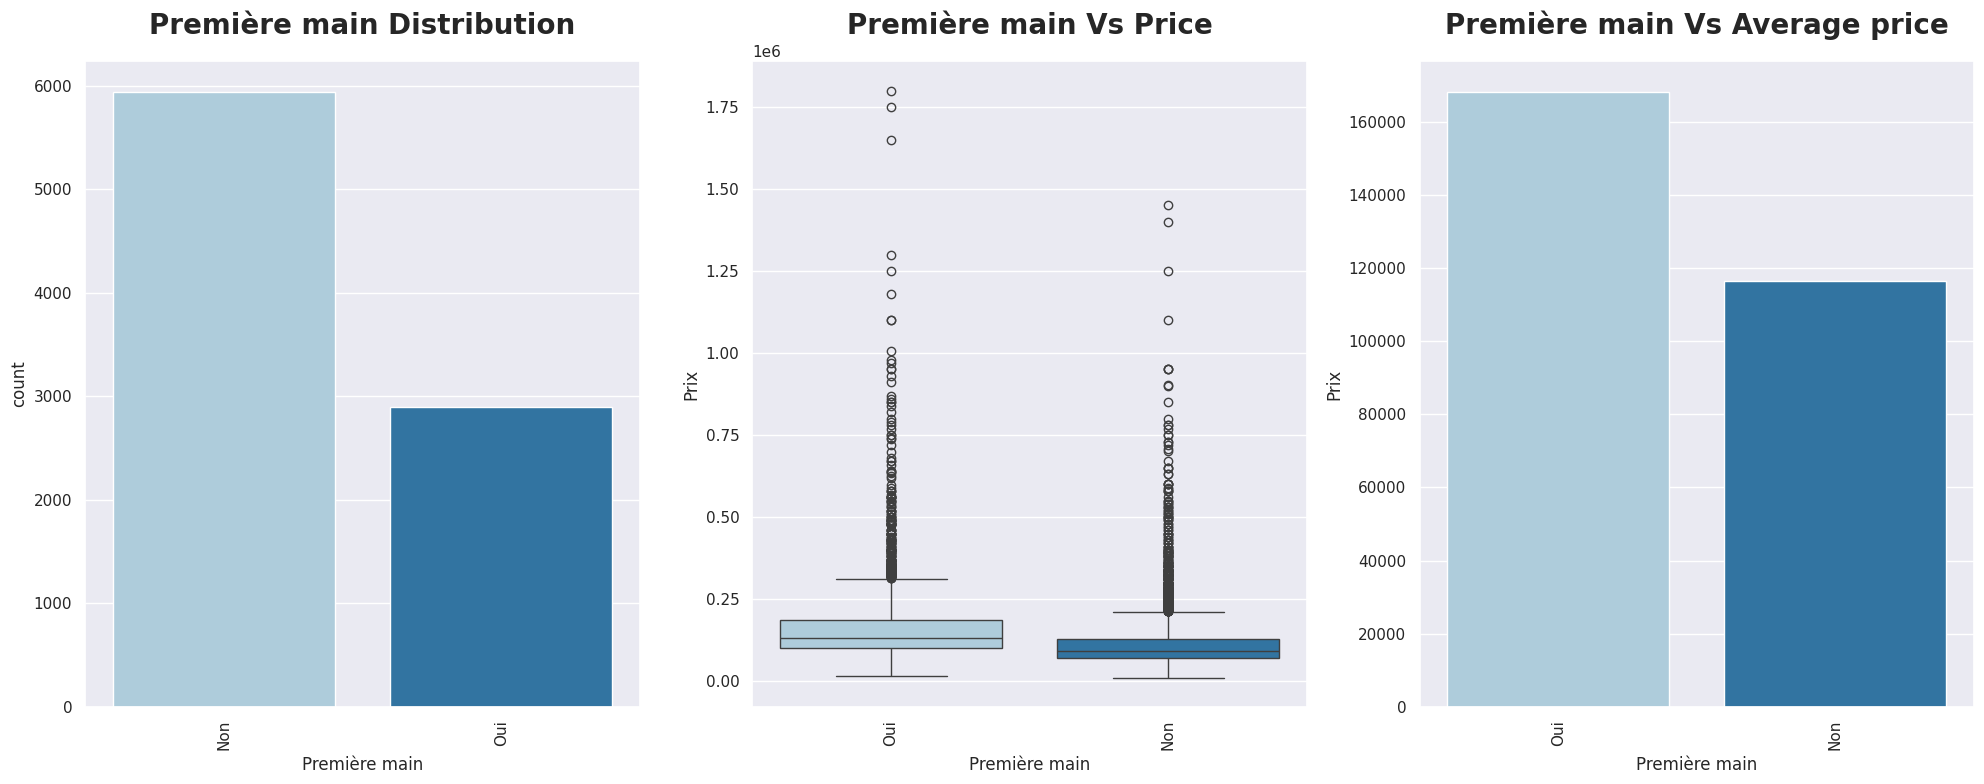

In [ ]:
# Visualizing Première main Feature
Categorical_visualization('Première main')

**Insight**
* The number of cars sold with previous owners are more than one owner
* Cars with one owner has higher average price

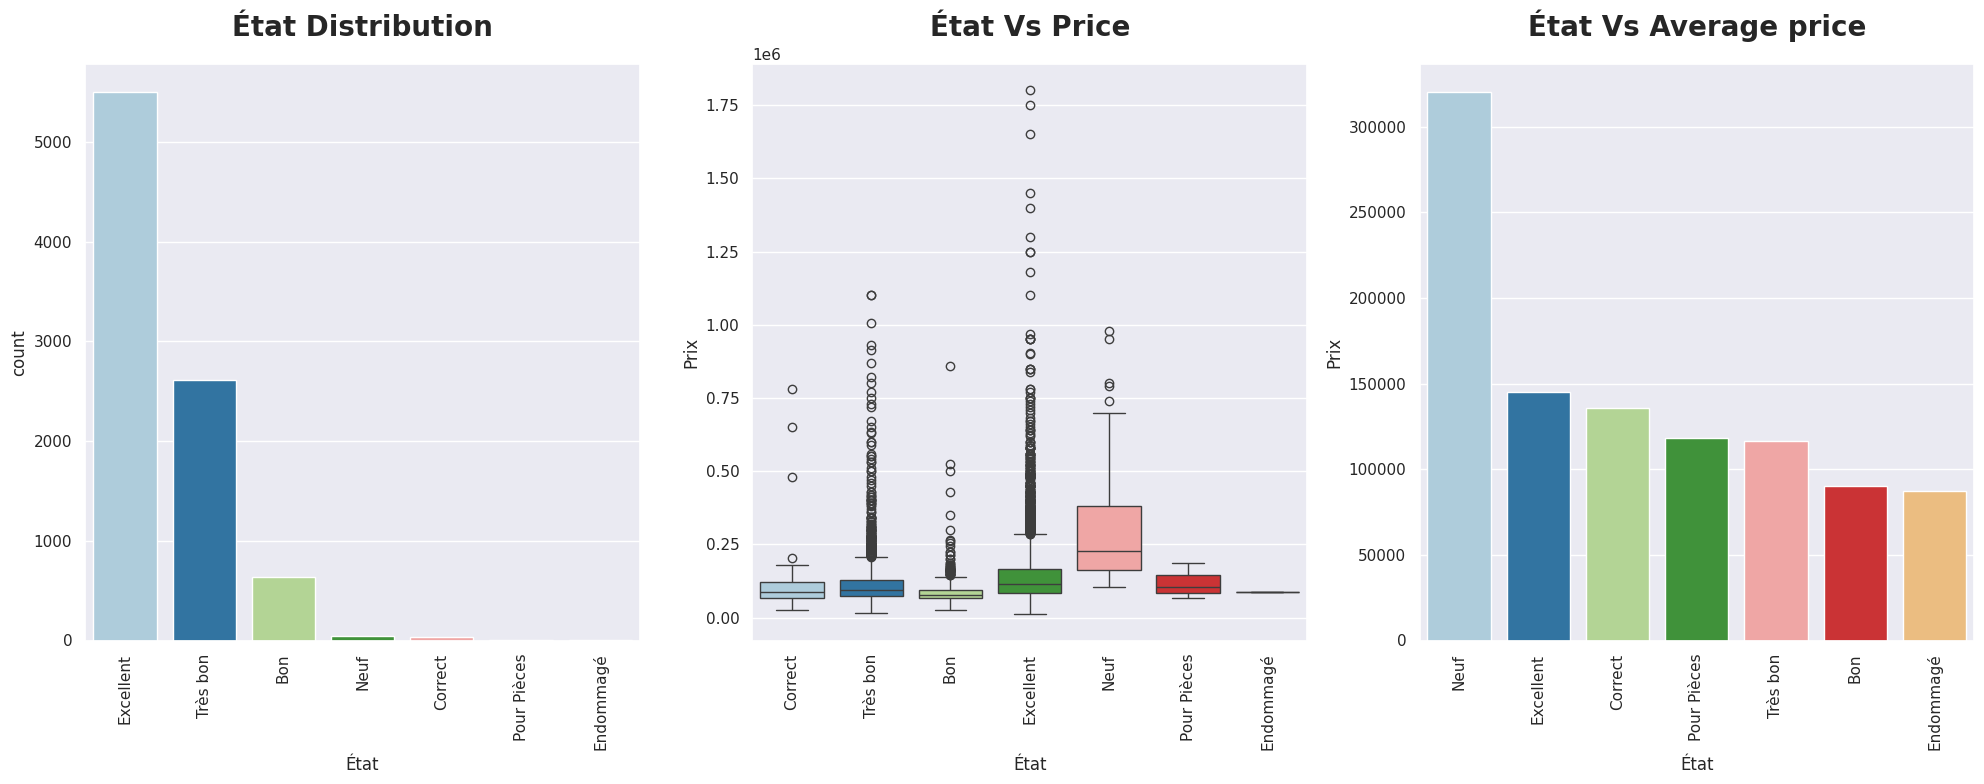

In [ ]:
# Visualizing Car État Feature
Categorical_visualization('État')

**Insight**
* Cars with 'Excellent' State are most sold with 'Tres Bon' as second
* Cars with 'Excellent' State have a larger price range than others

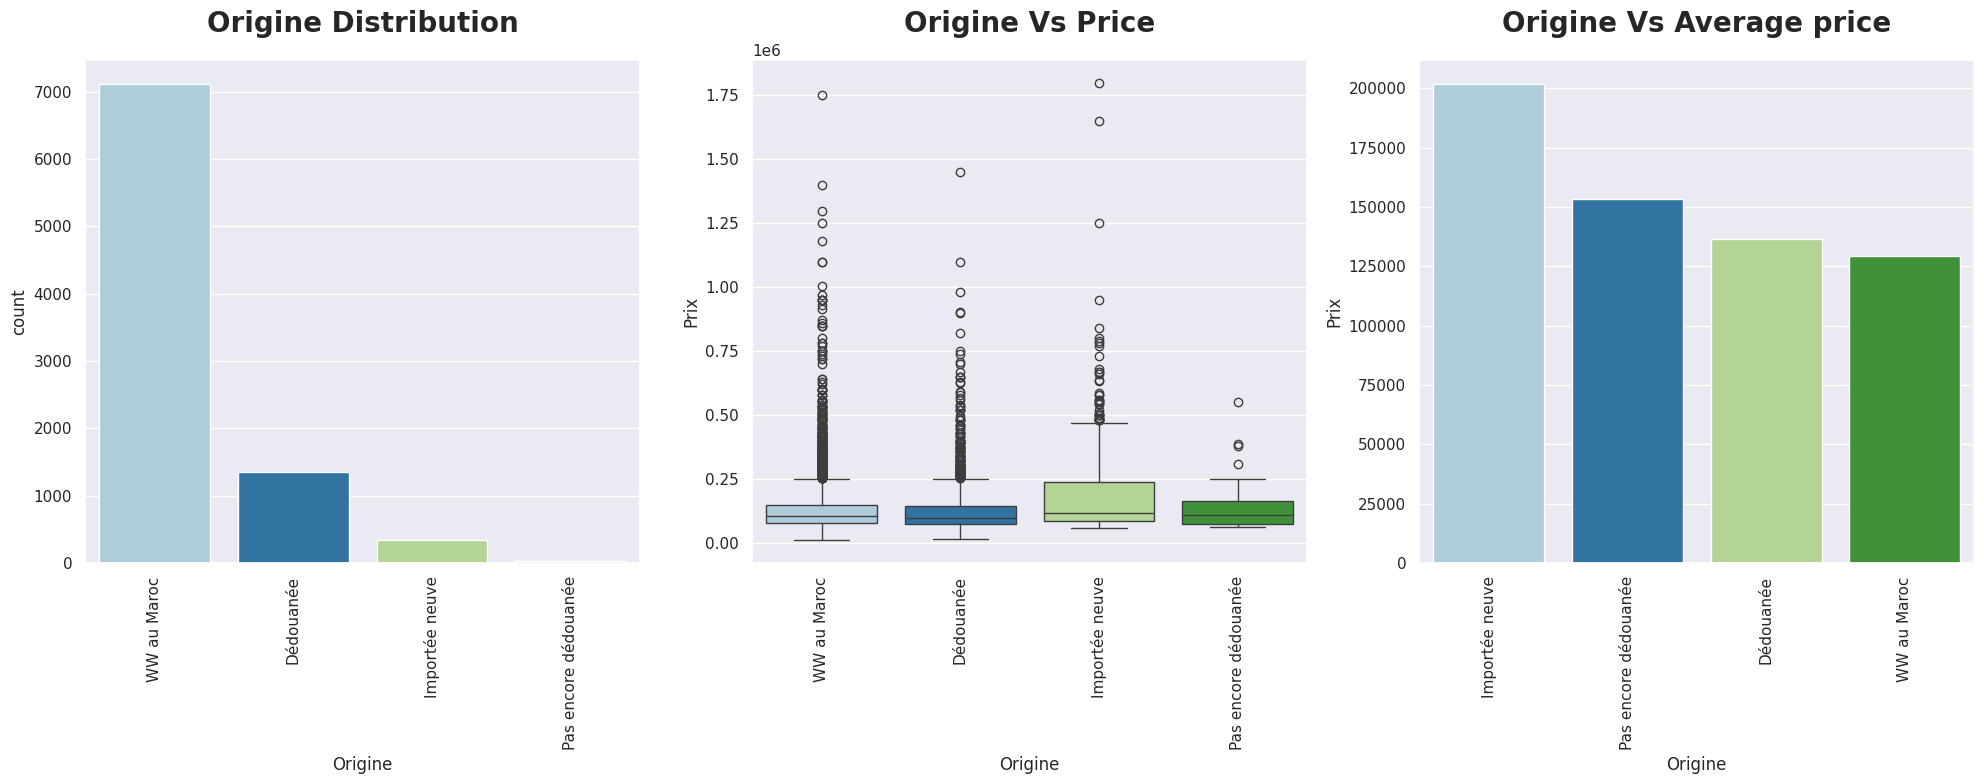

In [ ]:
# Visualizing Car Origine Feature
Categorical_visualization('Origine')

**Insight**
* Imported new vehicles are the most expensive, while locally registered ones are cheaper.
* Most available cars in the dataset are "WW au Maroc,"
* Imported and customs-cleared cars tend to have higher prices, indicating additional costs.

In [ ]:
# Visualizing Numerical Features

# To get all the Numerical columns
num_cols = df.select_dtypes(include=['int64'])
num_cols.head()

,Kilométrage,Nombre de portes,Puissance fiscale,Prix,Age
0,134999,5,8,180000,9
4,104999,5,6,109000,7
7,134999,5,8,430000,5
8,144999,5,8,190000,11
11,104999,5,12,670000,6


<Figure size 3000x3000 with 0 Axes>

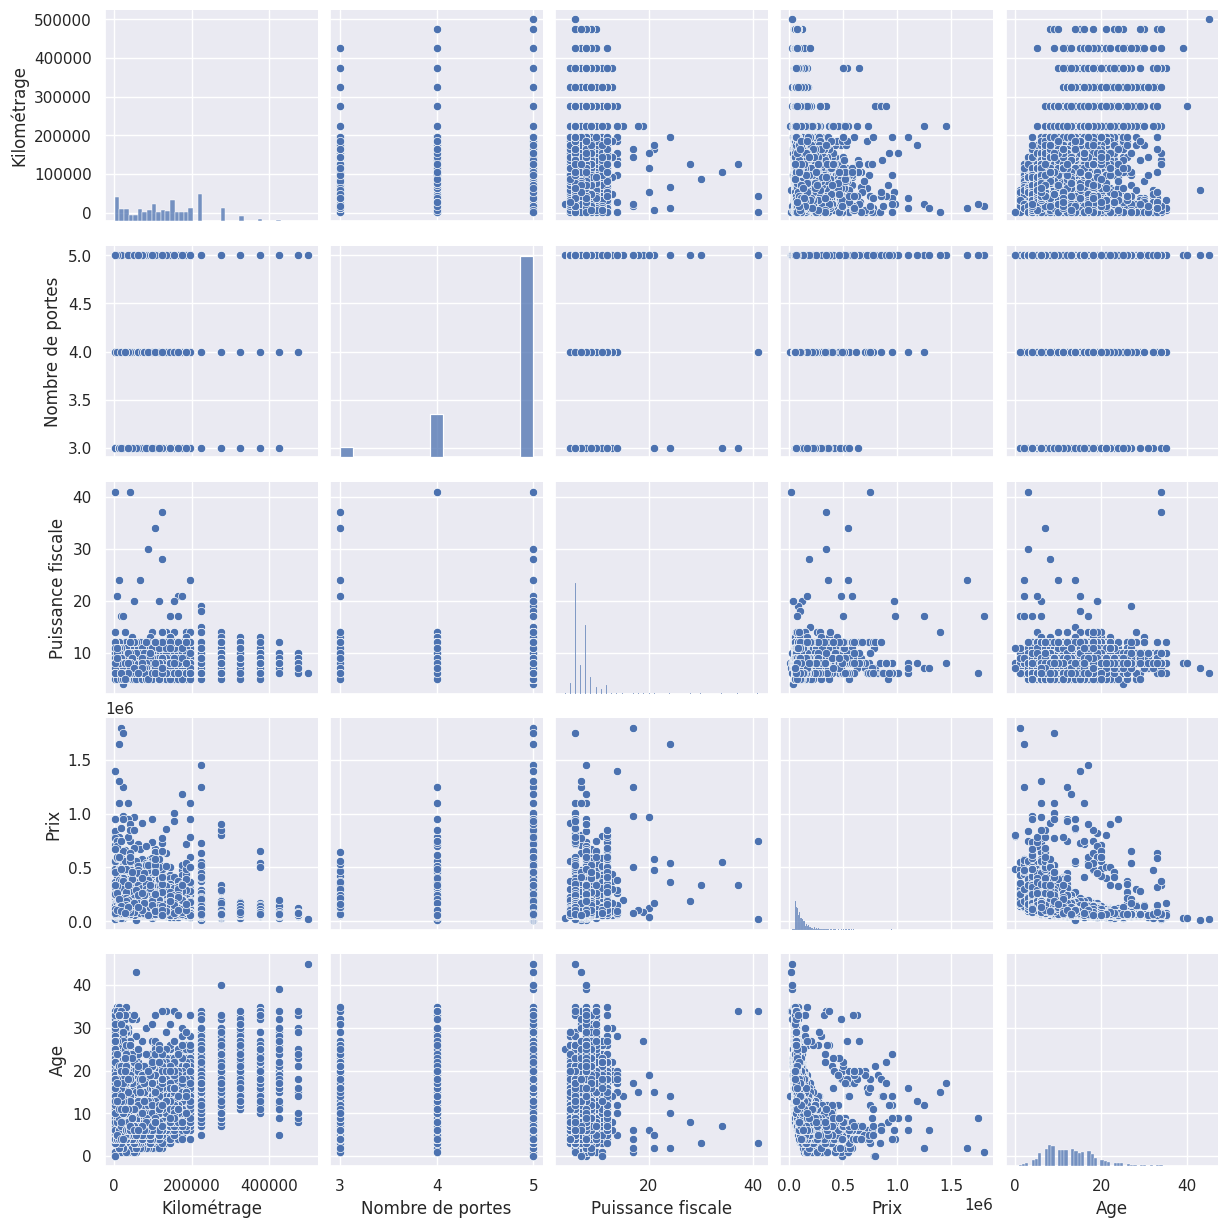

In [ ]:
# Pairplot of all numerical features
plt.figure(figsize = (30,30))
sns.pairplot(num_cols)
plt.show()

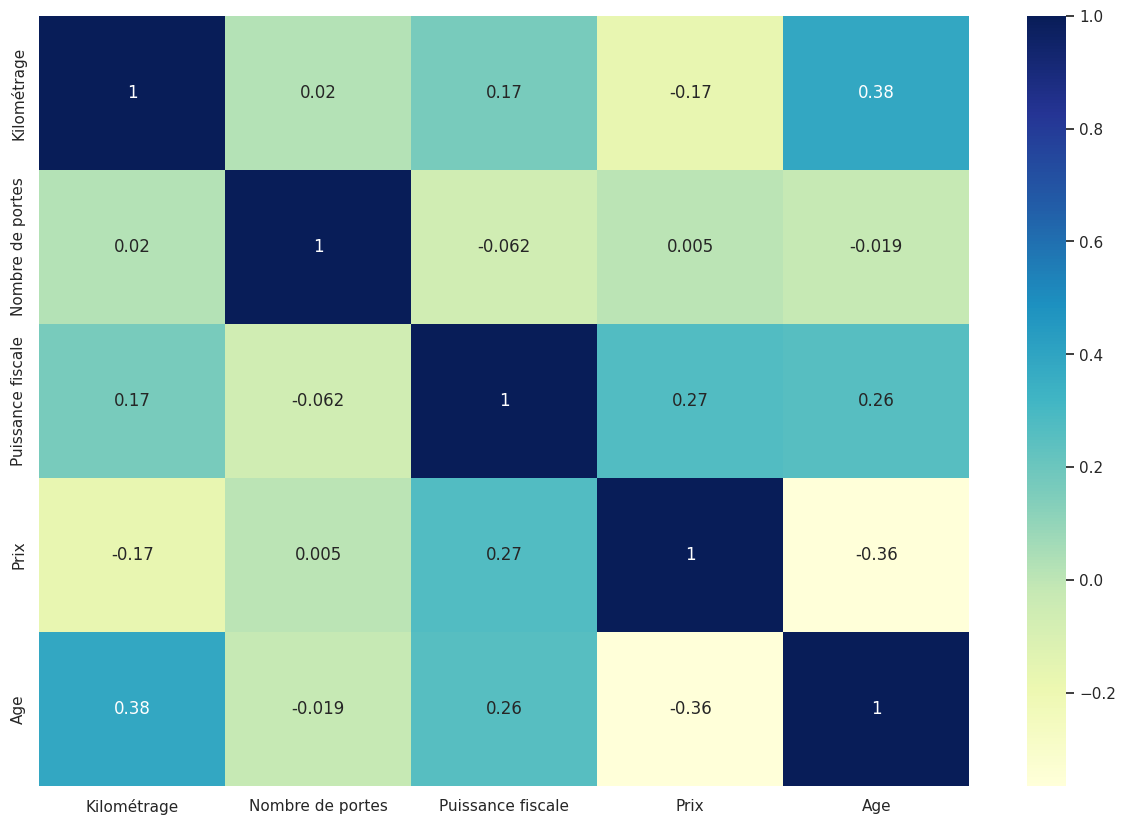

In [ ]:
# Heatmap of all numerical features
plt.figure(figsize=(15,10))
sns.heatmap(num_cols.corr(), annot=True, cmap='YlGnBu')
plt.show()

**Insight**
* Price is positively correlated with Puissance fiscal and negatively correlated with age and kilometrage
* age and kilometrage are positively correlated

In [ ]:
# Function to visualize Numerical features
def Scatter_Plot(cols):
  x = 1
  plt.figure(figsize=(20,8))
  for i in cols:
    plt.subplot(1,4,x)
    sns.scatterplot(x=i, y='Prix', data=df, color='blue')
    plt.title(f'{i} vs Price', fontweight='black', fontsize=20, pad=20)
    plt.tight_layout()
    x += 1

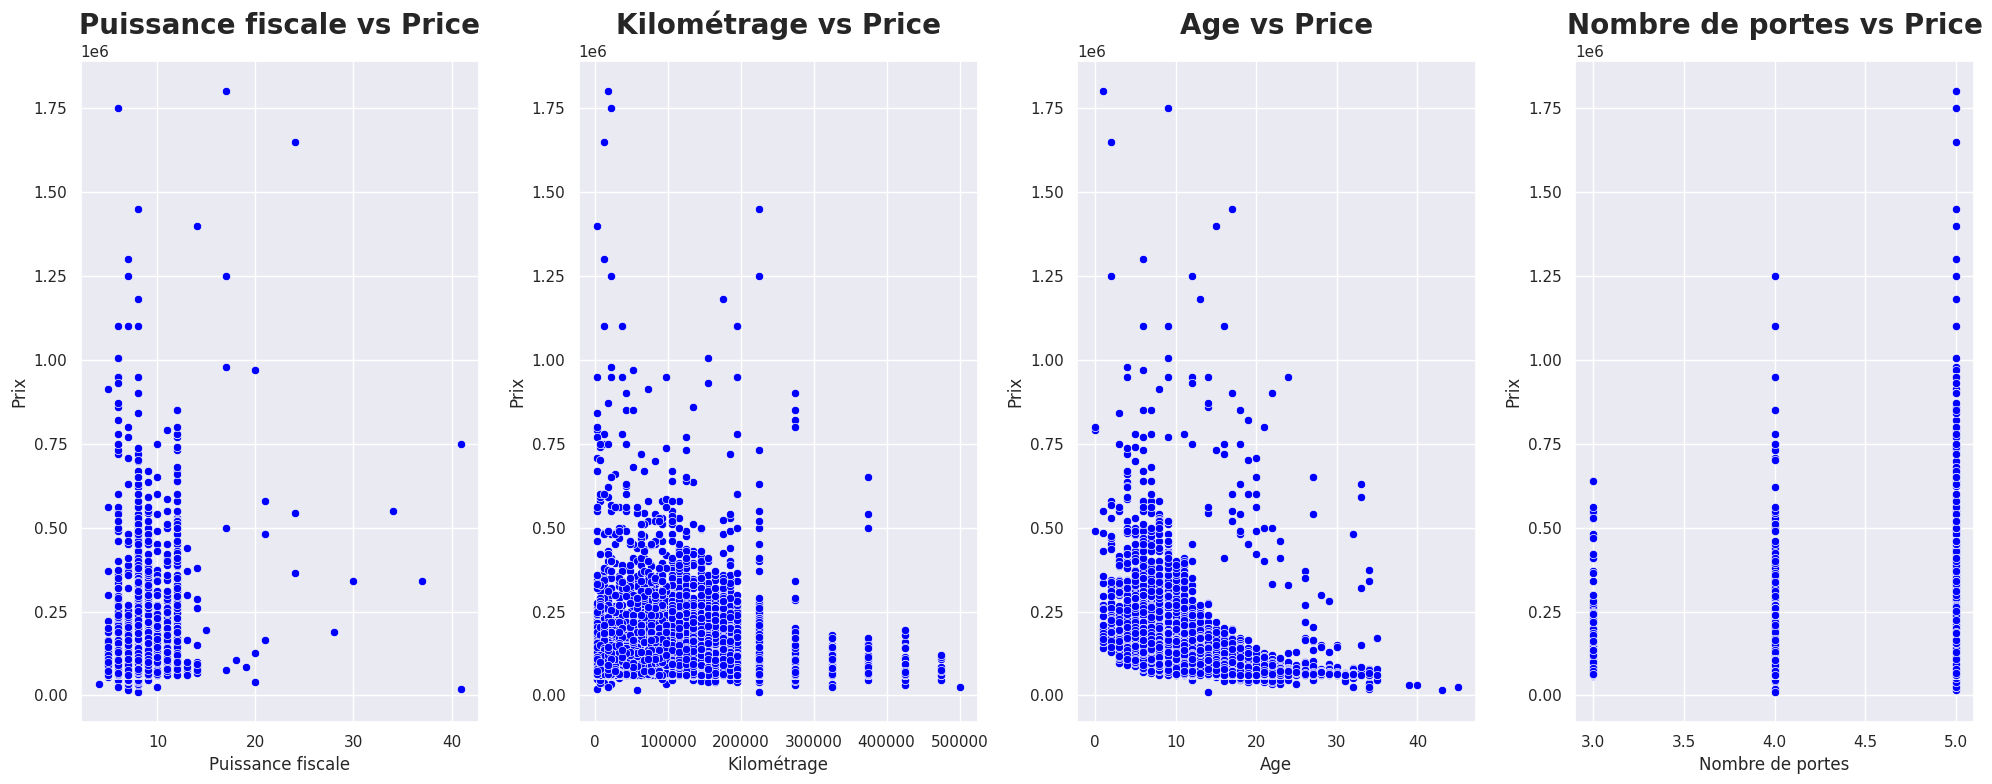

In [ ]:
# visualizing numerical features vs price in scatter plot
Scatter_Plot(['Puissance fiscale', 'Kilométrage', 'Age', 'Nombre de portes'])

**EDA Result**
* European cars are the most sold in morocco
* Most pices range between 100 000 and 225 000 DH
* Cadillac, Lexus, Tesla and Dodge have the highest average price with a low count of total cars
* the Average price of Essence fuel type cars are less than diesel fuel type cars while Electric and hybrid have the highest average price
* Automatique transmission has more than twice the average price that Manuelle
* Cars with one previous owner are sold with a higher price and a longer price range
* Cars that are sill in new or excellent state are sold with a higher average price
* Price is positively correlated with Puissance fiscal and negatively correlated with age and kilometrage
* age and kilometrage are positively correlated
* Number of doors does not effect the price with a low correlation

## Model Building

In [ ]:
# élimination des marque rare que nous n'avons pas assez d'informations sur

brands_to_remove = [
    "Suzuki", "mini", "Geely", "Chevrolet", "Jaguar", "Porsche",
    "Honda", "Volvo", "DS", "Mini", "Mitsubishi", "Abarth", "DFSK",
    "Lancia", "Mazda", "Lexus", "Tesla", "Dodge", "Cadillac"
]

df.drop(df[df['Marque'].isin(brands_to_remove)].index, inplace=True)


In [ ]:
# Checking for multicollinearity between age and kilometrage
X = df[['Age', 'Kilométrage']] # features to check for multicollinearity

# Calculate VIF for each feature (variance inflation factor)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       Feature  VIF
0          Age 3.51
1  Kilométrage 3.51


**Insight**
VIF is less than 5 so a low to moderate multicollinearity between age and kilometrage

In [ ]:
# Droping unimportant features
df.drop(['Secteur', 'Type'], axis=1, inplace=True)

In [ ]:
# One hot encoding
df = pd.get_dummies(columns=['Transmission', 'Type de carburant', 'Origine', 'Première main', 'État'], drop_first=True, data=df)

In [ ]:
# Create the encoder
binary_encoder = ce.BinaryEncoder(cols=['Modèle', 'Marque'])

# Apply to the dataframe
df = binary_encoder.fit_transform(df)

In [ ]:
# Create Label encoder
# le_marque = LabelEncoder()
# df['Marque'] = le_marque.fit_transform(df['Marque'])

# le_modele = LabelEncoder()
# df['Modèle'] = le_modele.fit_transform(df['Modèle'])

In [ ]:
# splitting data into train/test
X = df.drop('Prix', axis=1)
y = df['Prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print('X_train shape -->', X_train.shape)
print('X_test shape -->', X_test.shape)
print('y_train shape -->', y_train.shape)
print('y_test shape -->', y_test.shape)

X_train shape --> (6525, 32)
X_test shape --> (2175, 32)
y_train shape --> (6525,)
y_test shape --> (2175,)


In [ ]:
# Scaling Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Traget scaling
target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(np.log1p(y_train.values.reshape(-1, 1)))
y_test = target_scaler.fit_transform(np.log1p(y_test.values.reshape(-1, 1)))

In [ ]:
# Initializing algorithms for training

Linear_Regression = LinearRegression()
Decision_Tree_Regressor = DecisionTreeRegressor()
KNeighbors_Regressor = KNeighborsRegressor()
Random_Forest_Regressor = RandomForestRegressor()
Gradient_Boosting_Regressor = GradientBoostingRegressor()
XGBoost_Regressor = XGBRegressor()

In [ ]:
# Function to built model

training_r2_score = []
testing_r2_score= []

training_root_mean_squared_error = []
testing_root_mean_squared_error = []

training_mean_absolute_error = []
testing_mean_absolute_error = []

def final_model(mod):
  mod.fit(X_train, y_train)
  X_train_predicted = mod.predict(X_train)
  X_test_predicted = mod.predict(X_test)

  a = r2_score(y_train, X_train_predicted)*100 # r2_score
  b = r2_score(y_test, X_test_predicted)*100
  training_r2_score.append(a)
  testing_r2_score.append(b)

  mse1 = mean_squared_error(y_train, X_train_predicted) # mean_squared_error
  c = np.sqrt(mse1)
  mse2 = mean_squared_error(y_test, X_test_predicted)
  d = np.sqrt(mse2)
  training_root_mean_squared_error.append(c)
  testing_root_mean_squared_error.append(d)

  e = mean_absolute_error(y_train, X_train_predicted) # mean_absolute_error
  f = mean_absolute_error(y_test, X_test_predicted)
  training_mean_absolute_error.append(e)
  testing_mean_absolute_error.append(f)

  print(f"r2_Score of {mod} final model on Training Data is:",a)
  print(f"r2_Score of {mod} final model on Testing Data is:",b)
  print('---------------------------------------------------------------------------------------------------------')
  print(f"root_mean_squared_error of {mod} final model on Training Data is:",c)
  print(f"root_mean_squared_error of {mod} final model on Testing Data is:",d)
  print('---------------------------------------------------------------------------------------------------------')
  print(f"mean_absolute_error of {mod} final model on Training Data is:",e)
  print(f"mean_absolute_error of {mod} final model on Testing Data is:",f)

In [ ]:
# Linear Regression
final_model(Linear_Regression)

r2_Score of LinearRegression() final model on Training Data is: 60.06679441652513
r2_Score of LinearRegression() final model on Testing Data is: 60.12721454856924
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of LinearRegression() final model on Training Data is: 0.631927255176376
root_mean_squared_error of LinearRegression() final model on Testing Data is: 0.6314490118087981
---------------------------------------------------------------------------------------------------------
mean_absolute_error of LinearRegression() final model on Training Data is: 0.4077386541848848
mean_absolute_error of LinearRegression() final model on Testing Data is: 0.4281078442712727


In [ ]:
# Decision Tree Regressor
final_model(Decision_Tree_Regressor)

r2_Score of DecisionTreeRegressor() final model on Training Data is: 99.05629015788797
r2_Score of DecisionTreeRegressor() final model on Testing Data is: 50.71828712755426
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of DecisionTreeRegressor() final model on Training Data is: 0.09714472925033178
root_mean_squared_error of DecisionTreeRegressor() final model on Testing Data is: 0.7020093508810672
---------------------------------------------------------------------------------------------------------
mean_absolute_error of DecisionTreeRegressor() final model on Training Data is: 0.008182746416559637
mean_absolute_error of DecisionTreeRegressor() final model on Testing Data is: 0.3866765870057475


In [ ]:
# KNeighbors Regressor
final_model(KNeighbors_Regressor)

r2_Score of KNeighborsRegressor() final model on Training Data is: 74.81872585042113
r2_Score of KNeighborsRegressor() final model on Testing Data is: 60.952090249866316
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of KNeighborsRegressor() final model on Training Data is: 0.5018094673237927
root_mean_squared_error of KNeighborsRegressor() final model on Testing Data is: 0.6248832670998135
---------------------------------------------------------------------------------------------------------
mean_absolute_error of KNeighborsRegressor() final model on Training Data is: 0.3030786626651269
mean_absolute_error of KNeighborsRegressor() final model on Testing Data is: 0.3985773883423729


In [ ]:
# Random Forest Regressor
final_model(Random_Forest_Regressor)

r2_Score of RandomForestRegressor() final model on Training Data is: 95.17442831331367
r2_Score of RandomForestRegressor() final model on Testing Data is: 71.85702897613822
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of RandomForestRegressor() final model on Training Data is: 0.21967183903919796
root_mean_squared_error of RandomForestRegressor() final model on Testing Data is: 0.5304994912708378
---------------------------------------------------------------------------------------------------------
mean_absolute_error of RandomForestRegressor() final model on Training Data is: 0.1129495720132571
mean_absolute_error of RandomForestRegressor() final model on Testing Data is: 0.30269731190691707


In [ ]:
# Gradient Boosting Regressor
final_model(Gradient_Boosting_Regressor)

r2_Score of GradientBoostingRegressor() final model on Training Data is: 71.77427162717468
r2_Score of GradientBoostingRegressor() final model on Testing Data is: 67.54905646672087
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of GradientBoostingRegressor() final model on Training Data is: 0.5312789133103752
root_mean_squared_error of GradientBoostingRegressor() final model on Testing Data is: 0.5696572963921301
---------------------------------------------------------------------------------------------------------
mean_absolute_error of GradientBoostingRegressor() final model on Training Data is: 0.3342672330730565
mean_absolute_error of GradientBoostingRegressor() final model on Testing Data is: 0.37115493273828143


In [ ]:
# XGBRegressor
final_model(XGBoost_Regressor)

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) final model on Training Data is: 91.62864421354728
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_sto

In [ ]:
all_models = ['Linear_Regression', 'Decision_Tree_Regressor', 'KNeighbors_Regressor', 'Random_Forest_Regressor', 'Gradient_Boosting_Regressor', 'XGBRegressor']
comparision_df = pd.DataFrame({'Algorithms':all_models,
                               'Training_score':training_r2_score,
                               'Test_score':testing_r2_score})
comparision_df

,Algorithms,Training_score,Test_score
0,Linear_Regression,60.07,60.13
1,Decision_Tree_Regressor,99.06,50.72
2,KNeighbors_Regressor,74.82,60.95
3,Random_Forest_Regressor,95.17,71.86
4,Gradient_Boosting_Regressor,71.77,67.55
5,XGBRegressor,91.63,72.34


In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score

def bayesian_optimization(model_algorithm):
  # Define search space specific to RandomForestRegressor
  if model_algorithm == RandomForestRegressor:
    search_spaces = {
        'n_estimators': (100, 1000),
        'max_depth': (3, 10),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 20),
        'max_features': (0.5, 1.0) # Removed irrelevant parameters for RandomForestRegressor
    }
  # Define search space specific to XGBRegressor
  elif model_algorithm == XGBRegressor:
    search_spaces = {
        'n_estimators': (100, 1000),
        'learning_rate': (0.01, 0.3, 'log-uniform'),
        'max_depth': (3, 10),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0),
        'min_child_weight': (1, 10),
        'gamma': (0, 5),
        'reg_alpha': (0, 1.0),  # L1 regularization
        'reg_lambda': (0, 1.0)  # L2 regularization
    }
  else:
    # Keep the original search space for other algorithms
    search_spaces = {
        'n_estimators': (100, 1000),
        'learning_rate': (0.01, 0.3, 'log-uniform'),
        'max_depth': (3, 10),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 20),
        'subsample': (0.5, 1.0),
        'max_features': (0.5, 1.0)
    }

  # Initialize model
  if model_algorithm == XGBRegressor:
    model = model_algorithm(random_state=42, n_jobs=-1, objective='reg:squarederror')
  else:
    model = model_algorithm(random_state=42)

  # BayesSearchCV setup
  opt = BayesSearchCV(
      estimator=model,
      search_spaces=search_spaces,
      n_iter=50,  # More iterations = better results
      cv=5,
      scoring='r2',
      n_jobs=-1,
      verbose=2,
      random_state=42
  )

  # Fit
  opt.fit(X_train, y_train)

  # Best model & parameters
  print(f"Best R2 Score for {model_algorithm}:", opt.best_score_)
  print(f"Best Parameters for {model_algorithm}:", opt.best_params_)

  return opt

In [ ]:
def test_and_eval(model):
  # Get best model from BayesSearchCV
  best_model = model.best_estimator_

  # Predict on test set
  y_pred = best_model.predict(X_test)

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f"Test RMSE: {rmse:.2f}")

  # Actual vs Predicted Plot
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=y_test.ravel(), y=y_pred, alpha=0.6)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title("Actual vs Predicted Car Prices")
  plt.grid(True)
  plt.show()

  # Residual Plot
  residuals = y_test.ravel() - y_pred
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
  plt.axhline(0, color='red', linestyle='--')
  plt.xlabel("Predicted Price")
  plt.ylabel("Residual (Actual - Predicted)")
  plt.title("Residual Plot")
  plt.grid(True)
  plt.show()

  # Distribution of Residuals
  sns.histplot(residuals, kde=True)
  plt.title("Distribution of Residuals")
  plt.xlabel("Residual")
  plt.ylabel("Frequency")
  plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

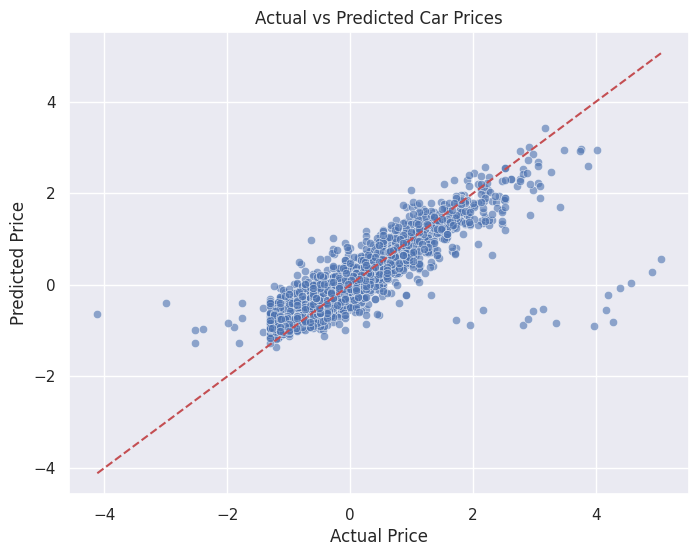

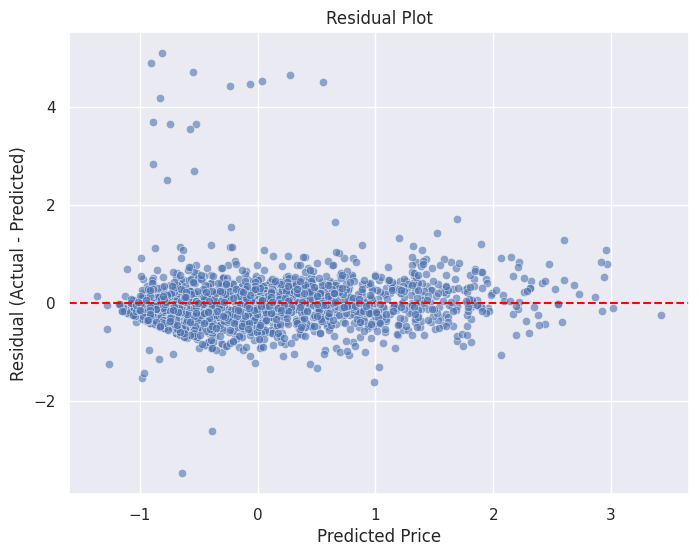

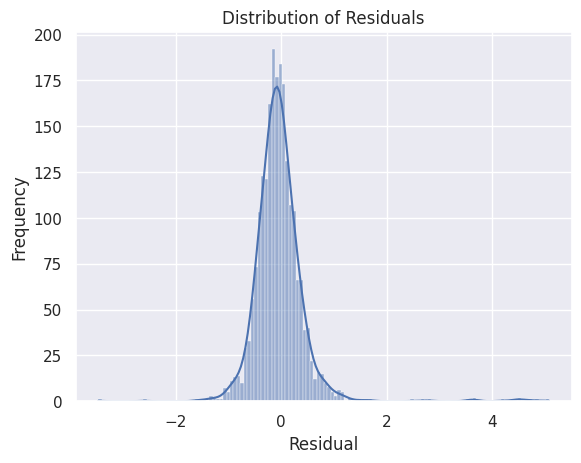

In [ ]:
# Optimizing XGBRegressor
XGBoost_Regressor = bayesian_optimization(XGBRegressor)
test_and_eval(XGBoost_Regressor)

In [ ]:
# Optimizing Gradient Boosting Regressor
Gradient_Boosting_Regressor = bayesian_optimization(GradientBoostingRegressor)
test_and_eval(Gradient_Boosting_Regressor)

In [ ]:
# Optimizing Random Forest Regressor
Random_Forest_Regressor = bayesian_optimization(RandomForestRegressor)
test_and_eval(Random_Forest_Regressor)